In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
from pythainlp import sent_tokenize, word_tokenize

In [51]:
docs = pd.read_csv('datasets/Open source [WeVis-Promise Tracker] Data - promise.csv')

In [52]:
docs['promiseTitle'].values

array(['1 จังหวัด 1 แหล่งท่องเที่ยว',
       '1 ตำบล 1 ทุน ทุนการศึกษาจบปริญญาตรีฟรี มีงานทำ',
       '1 ตำบล 1 ธนาคาร', '30 บาทรักษาทุกโรคได้จริง', '30 รักษาทั่วไทย',
       'LGBT สิทธิต้องเท่าเทียม\n\n', 'Single mom 10,000 บาทต่อเดือน',
       'Street food จัดระเบียบและหาสถานที่ทดแทนให้ร้านค้า',
       'Work@home ทำงานที่ไหนก็ได้ เงินเดือนเท่าเดิม',
       'กระจายรายได้ส่วนกลางต่อท้องถิ่น',
       'กระจายอำนาจอธิปไตยให้ชุมชนท้องถิ่น',
       'กองทุนกู้ยืมเพื่อการศึกษาระดับมหาวิทยาลัยโดยผู้กู้ยืมค้ำประกันตัวเองได้',
       'กัญชา 1,000,000 ไร่',
       'กัญชาไทย ปลูกได้เสรี และนำไปใช้ทางการแพทย์',
       'การเข้าถึงสินเชื่อดอกเบี้ยต่ำเพื่อที่อยู่อาศัยผู้มีรายได้น้อย',
       'การค้าออนไลน์อาชีพสงวนคนไทย',
       'การจัดตั้งกองทุนสวัสดิการเพื่อเกษตรกร เริ่มต้นที่วงเงิน 20,000 ล้านบาท',
       'การปฏิรูปพลังงาน',
       'การวางผังเมืองใหม่ให้กลายเป็น Green and Clean City',
       'ก้าวข้ามความขัดแย้ง เปลี่ยนแปลงปฏิรูปแผ่นดิน',
       'กำจัดอุปสรรคในการทำธุรกิจ',
       'เกษตรกรปลอดหนี้ใ

In [85]:
vectorizer = TfidfVectorizer(tokenizer=word_tokenize)
doc_matrix = vectorizer.fit_transform(docs['promiseTitle'].values)

In [62]:
doc_matrix[0]

<1x1062 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [67]:
cosine_similarity(doc_matrix[0],doc_matrix[3])

array([[0.03962221]])

In [97]:
group_word = []
for i,base in enumerate(doc_matrix):
    mk = []
    for j,target in enumerate(doc_matrix):
        if cosine_similarity(base,target)[0][0] >= 0.35:
            if docs['promiseTitle'].values[j] == docs['promiseTitle'].values[i]:
                continue
            else :
                mk.append(docs['promiseTitle'].values[j])
    group_word.append([docs['promiseTitle'].values[i],mk])

In [98]:
group_word

[['1 จังหวัด 1 แหล่งท่องเที่ยว',
  ['1 ตำบล 1 ทุน ทุนการศึกษาจบปริญญาตรีฟรี มีงานทำ',
   '1 ตำบล 1 ธนาคาร',
   'นโยบาย 1 ตำบล 1 นักศึกษาแพทย์',
   'เพิ่มนักโภชนาการ 1 คน ต่อ 1 เขต การศึกษา',
   'สร้าง co-working space ใน กทม. 1 แขวง 1 ที่ ไม่คิดค่าใช้จ่าย ไวไฟฟรี']],
 ['1 ตำบล 1 ทุน ทุนการศึกษาจบปริญญาตรีฟรี มีงานทำ',
  ['1 จังหวัด 1 แหล่งท่องเที่ยว',
   '1 ตำบล 1 ธนาคาร',
   'นโยบาย 1 ตำบล 1 นักศึกษาแพทย์',
   'เพิ่มนักโภชนาการ 1 คน ต่อ 1 เขต การศึกษา',
   'รักษาฟรีทุกโรค แบบมีคุณภาพ พร้อมรถตู้พยาบาลประจำตำบล ตำบลละ 1 คัน',
   'สร้าง co-working space ใน กทม. 1 แขวง 1 ที่ ไม่คิดค่าใช้จ่าย ไวไฟฟรี']],
 ['1 ตำบล 1 ธนาคาร',
  ['1 จังหวัด 1 แหล่งท่องเที่ยว',
   '1 ตำบล 1 ทุน ทุนการศึกษาจบปริญญาตรีฟรี มีงานทำ',
   'ธนาคารครู ธนาคารตำรวจ',
   'นโยบาย 1 ตำบล 1 นักศึกษาแพทย์',
   'เพิ่มนักโภชนาการ 1 คน ต่อ 1 เขต การศึกษา',
   'รักษาฟรีทุกโรค แบบมีคุณภาพ พร้อมรถตู้พยาบาลประจำตำบล ตำบลละ 1 คัน',
   'สร้าง co-working space ใน กทม. 1 แขวง 1 ที่ ไม่คิดค่าใช้จ่าย ไวไฟฟรี']],
 ['30 บาทรักษาทุกโรคได้จ

In [95]:
for i in group_word:
    if len(i[1]) <= 1:
        print(i)

['LGBT สิทธิต้องเท่าเทียม\n\n', ['ให้ท้องถิ่นตรวจสอบการทอดทิ้งที่ดิน เพื่อยึดเป็นของรัฐตามกฎหมายที่ดิน และจัดสรรที่ดินให้คนจนที่ยากไร้\n\n']]
['Street food จัดระเบียบและหาสถานที่ทดแทนให้ร้านค้า', []]
['Work@home ทำงานที่ไหนก็ได้ เงินเดือนเท่าเดิม', []]
['กระจายรายได้ส่วนกลางต่อท้องถิ่น', []]
['กองทุนกู้ยืมเพื่อการศึกษาระดับมหาวิทยาลัยโดยผู้กู้ยืมค้ำประกันตัวเองได้', []]
['กัญชาไทย ปลูกได้เสรี และนำไปใช้ทางการแพทย์', ['กัญชา 1,000,000 ไร่']]
['การเข้าถึงสินเชื่อดอกเบี้ยต่ำเพื่อที่อยู่อาศัยผู้มีรายได้น้อย', []]
['การค้าออนไลน์อาชีพสงวนคนไทย', []]
['การปฏิรูปพลังงาน', []]
['การวางผังเมืองใหม่ให้กลายเป็น Green and Clean City', []]
['ก้าวข้ามความขัดแย้ง เปลี่ยนแปลงปฏิรูปแผ่นดิน', []]
['กำจัดอุปสรรคในการทำธุรกิจ', ['ผลักดันธุรกิจ MICE']]
['เกิดปั๊บรับแสน', []]
['แก้กฎหมายที่เป็นอุปสรรค sharing economy (ทำ Grab ให้ถูกกฎหมาย)', []]
['แก้กฎหมายประมง ให้ทำอาชีพประมงง่ายขึ้น', ['ปลอดภาษีเครื่องจักรกลและเครื่องยนต์ เพื่อการเกษตรและประมง']]
['แก้กฎหมายเพื่อชาวรถบรรทุก', []]
['แก้ไขปัญหาความยากจน หน

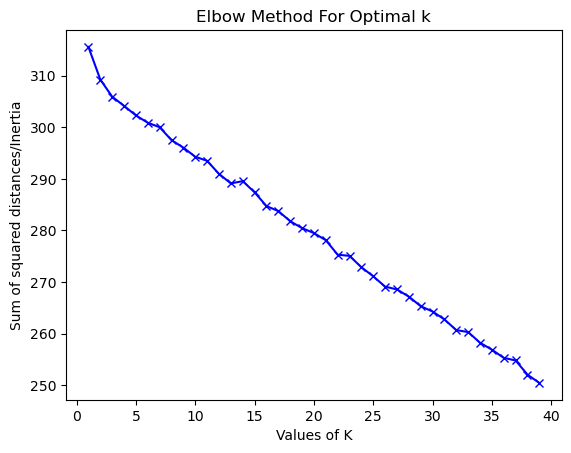

In [55]:
Sum_of_squared_distances = []
K = range(1,40)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(doc_matrix)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [56]:
kmeans = KMeans(n_clusters=24)
clustered_docs = kmeans.fit_predict(doc_matrix)

In [57]:
clustered_docs

array([ 1,  1,  1,  2,  2,  8, 10, 22,  5, 16, 16, 20,  3,  0,  0,  5,  3,
       22,  3,  3,  8, 17, 20, 11,  3,  9,  9,  3,  9,  9, 23,  5,  9,  3,
        3, 12, 19, 19, 17, 18,  3, 18, 18,  4, 18,  0,  8, 14, 10, 17,  3,
        0, 20,  8, 10,  3,  3, 11,  1,  3, 19,  3,  9, 10,  3, 19, 17, 20,
       20,  3,  4, 16,  4,  0, 15, 15,  7,  0,  6,  3,  7,  2,  3, 11,  1,
        9, 11,  4, 20, 20, 20,  3, 20,  3,  2, 18, 13,  3,  8,  1,  2,  6,
       19, 19, 14,  2, 20, 14,  7,  7,  3,  1,  0, 20, 13,  1, 20,  5,  5,
        3,  9, 14,  3,  9,  9,  3, 18, 10, 10, 10,  2,  3,  5,  6,  0, 12,
       10, 14, 14, 14,  1,  9, 17, 17, 17, 17, 17, 10,  4, 17, 12, 10,  3,
       20,  0,  2, 12,  6, 13, 13, 15,  4, 13,  2,  3,  0,  3, 23, 21,  3,
       14,  3, 15,  0,  8, 12, 17, 17, 17,  2, 21, 23, 17,  4,  4, 10, 10,
       21,  0, 10,  1, 10, 10, 10, 10, 10, 23, 16,  2, 16, 20, 10,  0, 14,
        3,  4, 20,  2, 20, 14,  4,  4, 16, 14,  4, 22,  4, 17, 23,  3, 23,
       11, 11, 23, 11, 11

In [58]:
import numpy as np

In [59]:
newdf = pd.DataFrame(columns=['data','label_clusters'],data=np.array([docs['promiseTitle'].values,clustered_docs]).T)

In [60]:
all_df = newdf[newdf['label_clusters'] == 0]
for i in range(1,13):
  all_df = all_df.append(newdf[newdf['label_clusters'] == i])

/var/folders/lb/rzz41thx5dlg4slgfnphv6n00000gn/T/ipykernel_1556/1897727857.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(newdf[newdf['label_clusters'] == i])
/var/folders/lb/rzz41thx5dlg4slgfnphv6n00000gn/T/ipykernel_1556/1897727857.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(newdf[newdf['label_clusters'] == i])
/var/folders/lb/rzz41thx5dlg4slgfnphv6n00000gn/T/ipykernel_1556/1897727857.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = all_df.append(newdf[newdf['label_clusters'] == i])
/var/folders/lb/rzz41thx5dlg4slgfnphv6n00000gn/T/ipykernel_1556/1897727857.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f

In [61]:
all_df.to_csv('mk.csv',index=False)